In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [47]:
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns =['price_range'])
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
X_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1230.911250,0.500625,1.53200,0.510625,4.255625,0.529375,32.132500,0.498875,140.324375,4.540625,9.787500,647.116875,1248.490625,2111.623750,12.32250,5.832500,11.002500,0.767500,0.506250,0.506875
std,440.365642,0.500156,0.81292,0.500043,4.350530,0.499292,18.296596,0.288554,35.504377,2.295461,6.075909,443.018624,431.569869,1088.817892,4.23671,4.352446,5.488175,0.422558,0.500117,0.500109
min,501.000000,0.000000,0.50000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.00000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,840.000000,0.000000,0.70000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,4.000000,286.000000,877.750000,1179.750000,9.00000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1219.500000,1.000000,1.50000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,572.000000,1240.000000,2118.500000,12.00000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1604.000000,1.000000,2.20000,1.000000,7.000000,1.000000,48.000000,0.800000,171.000000,7.000000,15.000000,942.500000,1629.250000,3035.750000,16.00000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.000000,3.00000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3996.000000,19.00000,18.000000,20.000000,1.000000,1.000000,1.000000


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1428 to 238
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1600 non-null   int64  
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   int64  
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   int64  
 12  px_width       1600 non-null   int64  
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch_

In [41]:
def evaluationTest(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    
    fig, ax = plt.subplots(figsize=(8, 5))   
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),display_labels=["class_0", "class_1", "class_2", "class_3"],)
    cmp.plot(ax=ax)            
    plt.show()

Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        89
           1       0.83      0.81      0.82       106
           2       0.77      0.83      0.80       104
           3       0.89      0.89      0.89       101

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.86       400
weighted avg       0.86      0.85      0.85       400



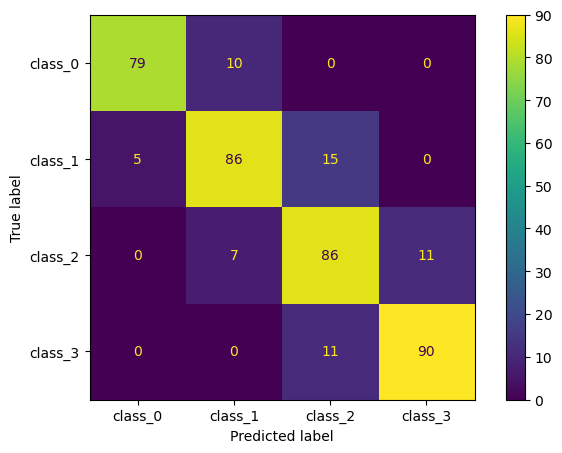

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        89
           1       0.89      0.87      0.88       106
           2       0.86      0.84      0.85       104
           3       0.90      0.94      0.92       101

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.89      0.90      0.89       400



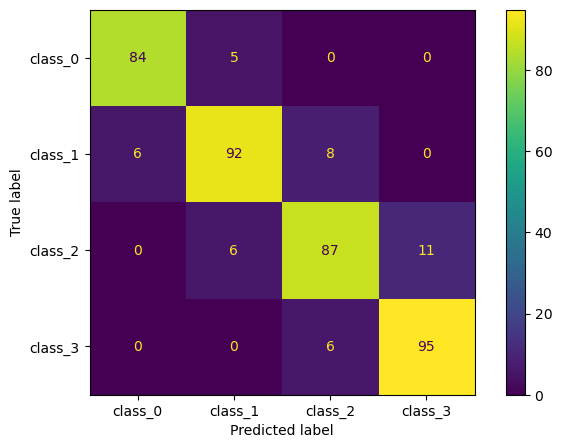

Support Vector Machine
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.97      0.98      0.98       106
           2       0.97      0.95      0.96       104
           3       0.96      0.98      0.97       101

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



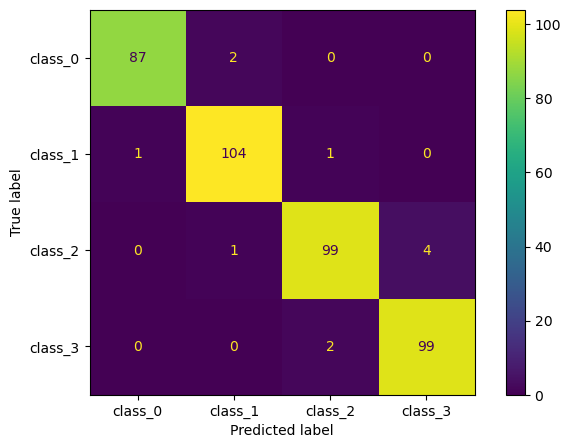

Gradient Boosting
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        89
           1       0.92      0.92      0.92       106
           2       0.87      0.88      0.88       104
           3       0.92      0.90      0.91       101

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



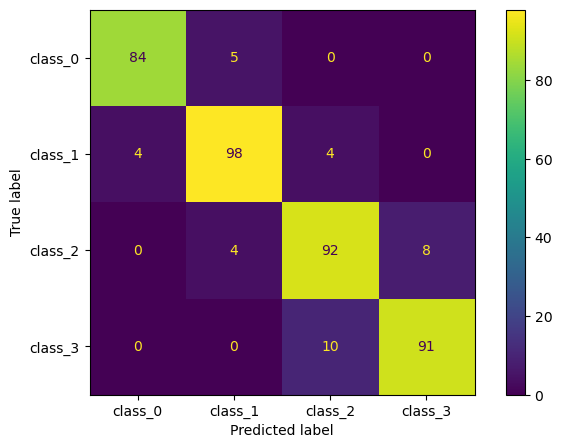

In [54]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(kernel ='linear', gamma=0.5, C=1.0),
    'Gradient Boosting': GradientBoostingClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name)
    evaluationTest(model)